In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-labels/new_labels.csv
/kaggle/input/gptvall/gpt_validation.csv


In [2]:
#label_csv = '/kaggle/input/projectttt-hu/project fix 2.csv'
label_csv = '/kaggle/input/new-labels/new_labels.csv'
df_8juli = pd.read_csv(label_csv)

In [3]:
df_8juli

,index,content,sentiment,candidate_mention,topic
0,20000,"Ganjar-Mahfud paham banget, SMK Berasrama Grat...",2,[3],2
1,20001,<mentionstart> Anies cocok jadi Presiden TikTok,1,[1],6
2,20002,Mantap emang dukungan makin banyak untuk prabo...,2,[2],7
3,20003,Ganjar-Mahfud jadi inspirasi buat pemimpin lai...,2,[3],6
4,20004,"<mentionstart> Iya sekali, DiTPSpastikan AYAHB...",2,[2],6
...,...,...,...,...,...
1997,21997,Sukses selalu untuk Ganjar-Mahfud yang mengins...,2,[3],4
1998,21998,Bukti ketulusan hati Prabowo: dedikasinya yang...,2,[2],6
1999,21999,<mentionstart> Yg nyinyir bilang emang gue pik...,4,[3],7
2000,22000,<mentionstart> All in ganjar loor,2,[3],0


In [4]:
df = df_8juli.copy()

In [5]:
df

,index,content,sentiment,candidate_mention,topic
0,20000,"Ganjar-Mahfud paham banget, SMK Berasrama Grat...",2,[3],2
1,20001,<mentionstart> Anies cocok jadi Presiden TikTok,1,[1],6
2,20002,Mantap emang dukungan makin banyak untuk prabo...,2,[2],7
3,20003,Ganjar-Mahfud jadi inspirasi buat pemimpin lai...,2,[3],6
4,20004,"<mentionstart> Iya sekali, DiTPSpastikan AYAHB...",2,[2],6
...,...,...,...,...,...
1997,21997,Sukses selalu untuk Ganjar-Mahfud yang mengins...,2,[3],4
1998,21998,Bukti ketulusan hati Prabowo: dedikasinya yang...,2,[2],6
1999,21999,<mentionstart> Yg nyinyir bilang emang gue pik...,4,[3],7
2000,22000,<mentionstart> All in ganjar loor,2,[3],0


In [6]:
df[:30]

,index,content,sentiment,candidate_mention,topic
0,20000,"Ganjar-Mahfud paham banget, SMK Berasrama Grat...",2,[3],2
1,20001,<mentionstart> Anies cocok jadi Presiden TikTok,1,[1],6
2,20002,Mantap emang dukungan makin banyak untuk prabo...,2,[2],7
3,20003,Ganjar-Mahfud jadi inspirasi buat pemimpin lai...,2,[3],6
4,20004,"<mentionstart> Iya sekali, DiTPSpastikan AYAHB...",2,[2],6
5,20005,<mentionstart> emg ganjar make mek ap yah?,5,[0],0
6,20006,<mentionstart> Beneran ya prabowo pakai konsul...,5,[0],0
7,20007,Awal-awal Anies sudah setting taktik mentality...,5,[1],0
8,20008,<mentionstart> <mentionmiddle> <mentionmiddle>...,3,[2],6
9,20009,<mentionstart> <mentionmiddle> Anies nyapres A...,3,"[1, 2, 3]",6


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Data train dalam bentuk dataframe
train_label = '/kaggle/input/gptvall/gpt_validation.csv'
train_data = pd.read_csv(train_label, delimiter=';')

# Data label manual untuk validasi
val_labels = df.head(1800)  # Contoh label manual untuk validasi
val_labels = val_labels.rename(columns={'sentiment': 'S', 'candidate_mention': 'C', 'topic': 'T'})

In [8]:
val_labels

,index,content,S,C,T
0,20000,"Ganjar-Mahfud paham banget, SMK Berasrama Grat...",2,[3],2
1,20001,<mentionstart> Anies cocok jadi Presiden TikTok,1,[1],6
2,20002,Mantap emang dukungan makin banyak untuk prabo...,2,[2],7
3,20003,Ganjar-Mahfud jadi inspirasi buat pemimpin lai...,2,[3],6
4,20004,"<mentionstart> Iya sekali, DiTPSpastikan AYAHB...",2,[2],6
...,...,...,...,...,...
1795,21795,Optimis Prabowo-Gibran Menang Satu Putaran #Fa...,2,[2],0
1796,21796,<mentionstart> Salfok ke Prabowo gibran,5,[2],0
1797,21797,"Ganjar Pranowo dan Mahfud MD, duo yang bisa me...",2,[3],6
1798,21798,"Euy, mantap banget pesan Pak Erick Thohir buat...",2,[2],6


In [9]:
train_data

,index,content,S,C,T
0,20000,"Ganjar-Mahfud paham banget, SMK Berasrama Grat...",2,[3],2
1,20001,<mentionstart> Anies cocok jadi Presiden TikTok,1,[1],6
2,20002,Mantap emang dukungan makin banyak untuk prabo...,2,[2],7
3,20003,Ganjar-Mahfud jadi inspirasi buat pemimpin lai...,2,[3],6
4,20004,"<mentionstart> Iya sekali, DiTPSpastikan AYAHB...",2,[2],6
...,...,...,...,...,...
1795,21795,Optimis Prabowo-Gibran Menang Satu Putaran #Fa...,2,[2],0
1796,21796,<mentionstart> Salfok ke Prabowo gibran,5,[2],0
1797,21797,"Ganjar Pranowo dan Mahfud MD, duo yang bisa me...",2,[3],0
1798,21798,"Euy, mantap banget pesan Pak Erick Thohir buat...",2,[2],4


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [11]:
import re
new = val_labels['C'].apply(lambda x: x if isinstance(x, list) else [x])
new_c = train_data['C'].apply(lambda x: x if isinstance(x, list) else [x])
# Mengubah ke list biasa
new_cc = [sublist[0] if len(sublist) == 1 else sublist for sublist in new_c]
new_ccc = []
for item in new_cc:
    # Menggunakan regular expression untuk mencari angka di dalam string
    numbers = re.findall(r'\d+', item)
    # Mengubah angka-angka tersebut menjadi integer
    numbers = [int(num) for num in numbers]
    new_ccc.append(numbers)

In [12]:
# Dictionary untuk mengkonversi kombinasi menjadi angka unik
combination_to_unique = {
    ('[2, 3, 1]',): 7,
    ('[3, 1, 2]',): 7,
    ('[1, 2, 3]',): 7,
    (1, 2, 3): 7,
    ('[3, 2]',):6,
    ('[2, 3]',): 6,
    (2, 3): 6,
    ('[3, 1]',): 5,
    ('[1, 3]',): 5,
    (1, 3): 5,
    ('[1, 2]',): 4,
    ('[2, 1]',): 4,
    (1, 2): 4,
    ('[2]',): 2,
    (2,): 2,
    ('[3]',): 3,
    (3,): 3,
    ('[1]',): 1,
    (1,): 1,
    (0,): 0,
    ('[0]',): 0,
}

# Fungsi untuk mengubah list ke angka unik
def convert_to_unique(lst):
    return combination_to_unique[tuple(sorted(lst))]

# Mengonversi y_true menggunakan fungsi convert_to_unique
y_true_converted = [convert_to_unique(item) for item in new]
y_pred_converted = [convert_to_unique(item) for item in new_ccc]

In [13]:
y_true_C = np.array(y_true_converted).reshape(-1, 1)
y_pred_C = np.array(y_pred_converted).reshape(-1, 1)
y_true_S = np.array(val_labels['S']).reshape(-1, 1)
y_pred_S = np.array(train_data['S']).reshape(-1, 1)
y_true_T = np.array(val_labels['T']).reshape(-1, 1)
y_pred_T = np.array(train_data['T']).reshape(-1, 1)

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y_true_C_encoded = encoder.fit_transform(y_true_C)
y_pred_C_encoded = encoder.transform(y_pred_C)
y_true_S_encoded = encoder.fit_transform(y_true_S)
y_pred_S_encoded = encoder.transform(y_pred_S)
y_true_T_encoded = encoder.fit_transform(y_true_T)
y_pred_T_encoded = encoder.transform(y_pred_T)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SKOR sentiment
              precision    recall  f1-score   support

           1       0.84      0.83      0.84       431
           2       0.87      0.96      0.91       961
           3       0.77      0.39      0.52        51
           4       0.82      0.29      0.43        62
           5       0.77      0.68      0.73       295

   micro avg       0.85      0.85      0.85      1800
   macro avg       0.82      0.63      0.69      1800
weighted avg       0.84      0.85      0.84      1800
 samples avg       0.85      0.85      0.85      1800

Accuracy: 0.8478

Confussion Matrix


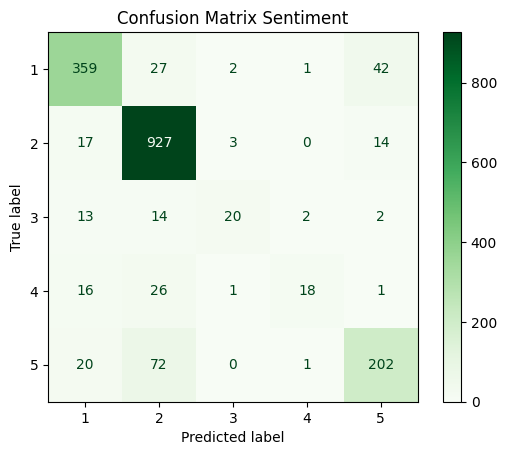

In [15]:
# Mendefinisikan target names
target_names_S = ["1", "2", "3", "4", "5"]

# Membuat classification report
report_S = classification_report(y_true_S_encoded, y_pred_S_encoded, target_names=target_names_S)
acc_s = accuracy_score(y_true_S_encoded, y_pred_S_encoded)
# Decode label untuk mendapatkan label asli dari one-hot encoding
y_true_S_decoded = np.argmax(y_true_S_encoded, axis=1)
y_pred_S_decoded = np.argmax(y_pred_S_encoded, axis=1)
c_mt_S = confusion_matrix(y_true_S_decoded, y_pred_S_decoded) 
print('SKOR sentiment')
print(report_S)
print(f'Accuracy: {acc_s:.4f}')
print('\nConfussion Matrix')
#display plot
disp = ConfusionMatrixDisplay(confusion_matrix=c_mt_S, display_labels=target_names_S)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix Sentiment')
plt.show()

SKOR KANDIDAT
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       178
           1       0.95      0.94      0.95       355
           2       0.93      0.94      0.93       561
           3       0.98      0.98      0.98       618
           4       0.74      0.95      0.83        21
           5       0.82      0.96      0.89        28
           6       0.61      1.00      0.76        22
           7       0.93      0.82      0.87        17

   micro avg       0.93      0.93      0.93      1800
   macro avg       0.85      0.91      0.87      1800
weighted avg       0.93      0.93      0.93      1800
 samples avg       0.93      0.93      0.93      1800

Accuracy: 0.9289

Confussion Matrix


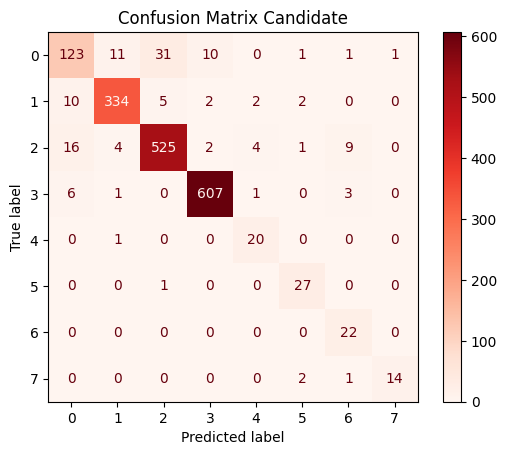

In [16]:
# Mendefinisikan target names
target_names_C = ["0", "1", "2", "3", "4", "5", "6", "7"]

# Membuat classification report
report_C = classification_report(y_true_C_encoded, y_pred_C_encoded, target_names=target_names_C)
acc_c = accuracy_score(y_true_C_encoded, y_pred_C_encoded)
# Decode label untuk mendapatkan label asli dari one-hot encoding
y_true_C_decoded = np.argmax(y_true_C_encoded, axis=1)
y_pred_C_decoded = np.argmax(y_pred_C_encoded, axis=1)
c_mt_C = confusion_matrix(y_true_C_decoded, y_pred_C_decoded) 
print('SKOR KANDIDAT')
print(report_C)
print(f'Accuracy: {acc_c:.4f}')
print('\nConfussion Matrix')

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=c_mt_C, display_labels=target_names_C)
disp.plot(cmap='Reds')
plt.title('Confusion Matrix Candidate')
plt.show()

SKOR TOPICS
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       606
           1       0.91      0.95      0.93       117
           2       0.98      0.76      0.86        84
           3       0.94      0.94      0.94        48
           4       0.93      0.85      0.89        65
           5       0.91      0.89      0.90        56
           6       0.78      0.89      0.83       457
           7       0.84      0.83      0.84       206
           8       0.89      0.65      0.75       161

   micro avg       0.85      0.85      0.85      1800
   macro avg       0.90      0.85      0.87      1800
weighted avg       0.86      0.85      0.85      1800
 samples avg       0.85      0.85      0.85      1800

Accuracy: 0.8544
Confussion Matrix


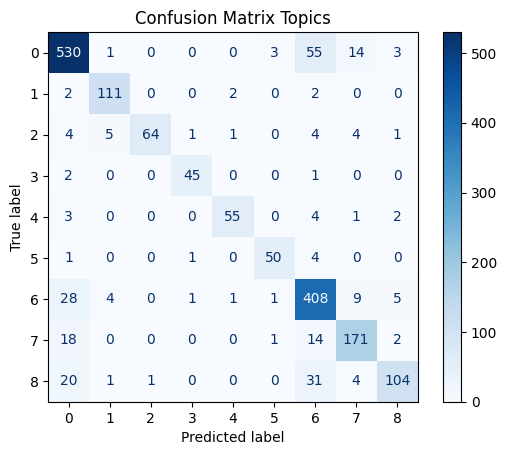

In [17]:
# Mendefinisikan target names
target_names_T = ["0", "1", "2", "3", "4", "5", "6", "7", "8"]

# Membuat classification report
report_T = classification_report(y_true_T_encoded, y_pred_T_encoded, target_names=target_names_T)
acc_T = accuracy_score(y_true_T_encoded, y_pred_T_encoded)
# Decode label untuk mendapatkan label asli dari one-hot encoding
y_true_T_decoded = np.argmax(y_true_T_encoded, axis=1)
y_pred_T_decoded = np.argmax(y_pred_T_encoded, axis=1)
c_mt_T = confusion_matrix(y_true_T_decoded, y_pred_T_decoded) 
print('SKOR TOPICS')
print(report_T)
print(f'Accuracy: {acc_T:.4f}')
print('Confussion Matrix')
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=c_mt_T, display_labels=target_names_T)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix Topics')
plt.show()

# JIKA COMPARATIVE DIGABUNG

In [18]:
df_beda = df_8juli.copy()

In [19]:
df_beda = df_beda[:1800]

In [20]:
def map_sentiment_train(value):
    mapping = {
        5: 4,
        5: 4,
        4: 3,
        3: 3,
        2: 2,
        1: 1,
    }
    return mapping.get(value, 4)

In [21]:
train_beda = train_data.copy()

In [22]:
train_data[125:150]

,index,content,S,C,T
125,20125,"<mentionstart> aslii, padahal pas debat sebelu...",1,[1],6
126,20126,"<mentionstart> Wah kalo Anies lost di 2024, Ga...",3,"[1, 3]",0
127,20127,"<mentionstart> Sini mas ngopi , cie si paling ...",5,[0],0
128,20128,<mentionstart> <mentionmiddle> <mentionmiddle>...,1,[3],6
129,20129,Para buzzer Ganjar mulai nyerang Bobby Nst,5,[0],0
130,20130,S3mangat untuk memilih pemimpin yang mampu men...,2,[3],1
131,20131,"Kembali ke otakm waras, waktunya memenangkan p...",2,[2],6
132,20132,<mentionstart> <mentionmiddle> <mentionmiddle>...,1,[2],6
133,20133,<mentionstart> Energi positif Ganjar-Mahfud ad...,2,[3],1
134,20134,"Ganjar - Mahfud, ayo rame-rame, bikin Int3rnet...",2,[3],1


In [23]:
#data baru
df_beda.loc[:, 'sentiment'] = df_beda['sentiment'].apply(map_sentiment_train)
train_beda.loc[:, 'S'] = train_beda['S'].apply(map_sentiment_train)
train_beda[125:150]

,index,content,S,C,T
125,20125,"<mentionstart> aslii, padahal pas debat sebelu...",1,[1],6
126,20126,"<mentionstart> Wah kalo Anies lost di 2024, Ga...",3,"[1, 3]",0
127,20127,"<mentionstart> Sini mas ngopi , cie si paling ...",4,[0],0
128,20128,<mentionstart> <mentionmiddle> <mentionmiddle>...,1,[3],6
129,20129,Para buzzer Ganjar mulai nyerang Bobby Nst,4,[0],0
130,20130,S3mangat untuk memilih pemimpin yang mampu men...,2,[3],1
131,20131,"Kembali ke otakm waras, waktunya memenangkan p...",2,[2],6
132,20132,<mentionstart> <mentionmiddle> <mentionmiddle>...,1,[2],6
133,20133,<mentionstart> Energi positif Ganjar-Mahfud ad...,2,[3],1
134,20134,"Ganjar - Mahfud, ayo rame-rame, bikin Int3rnet...",2,[3],1


In [24]:
df_beda[125:150]

,index,content,sentiment,candidate_mention,topic
125,20125,"<mentionstart> aslii, padahal pas debat sebelu...",3,[1],6
126,20126,"<mentionstart> Wah kalo Anies lost di 2024, Ga...",3,"[1, 3]",8
127,20127,"<mentionstart> Sini mas ngopi , cie si paling ...",4,[2],0
128,20128,<mentionstart> <mentionmiddle> <mentionmiddle>...,1,[3],6
129,20129,Para buzzer Ganjar mulai nyerang Bobby Nst,4,[0],0
130,20130,S3mangat untuk memilih pemimpin yang mampu men...,2,[3],1
131,20131,"Kembali ke otakm waras, waktunya memenangkan p...",2,[2],6
132,20132,<mentionstart> <mentionmiddle> <mentionmiddle>...,1,[2],6
133,20133,<mentionstart> Energi positif Ganjar-Mahfud ad...,2,[3],1
134,20134,"Ganjar - Mahfud, ayo rame-rame, bikin Int3rnet...",2,[3],1


In [25]:
train_beda['S'].unique()

array([2, 1, 4, 3])

In [26]:
y_true_S_bd = np.array(df_beda['sentiment']).reshape(-1, 1)
y_pred_S_bd = np.array(train_beda['S']).reshape(-1, 1)

In [27]:
y_true_S_bd_encoded = encoder.fit_transform(y_true_S_bd)
y_pred_S_bd_encoded = encoder.fit_transform(y_pred_S_bd)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


SKOR Sentiment Jika Comparative dimerge
              precision    recall  f1-score   support

           1       0.84      0.83      0.84       431
           2       0.87      0.96      0.91       961
           3       0.85      0.36      0.51       113
           4       0.77      0.68      0.73       295

   micro avg       0.85      0.85      0.85      1800
   macro avg       0.84      0.71      0.75      1800
weighted avg       0.85      0.85      0.84      1800
 samples avg       0.85      0.85      0.85      1800

Accuracy: 0.8494
Confusion Matrix:


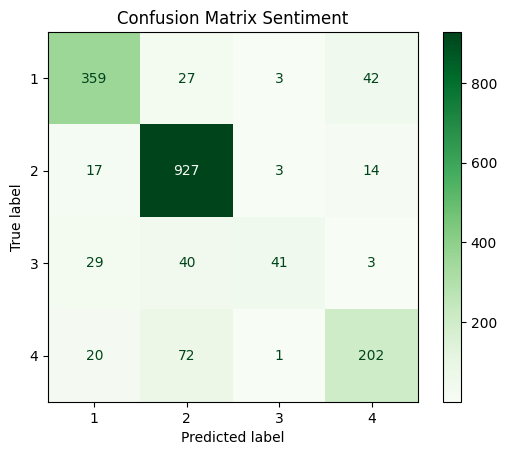

In [28]:
# Mendefinisikan target names
target_names_S_bd = ["1", "2", "3", "4"]

# Membuat classification report
report_S_bd = classification_report(y_true_S_bd_encoded, y_pred_S_bd_encoded, target_names=target_names_S_bd)
acc_s_bd = accuracy_score(y_true_S_bd_encoded, y_pred_S_bd_encoded)
# Decode label untuk mendapatkan label asli dari one-hot encoding
y_true_S_bd_decoded = np.argmax(y_true_S_bd_encoded, axis=1)
y_pred_S_bd_decoded = np.argmax(y_pred_S_bd_encoded, axis=1)
c_mt_s_bd = confusion_matrix(y_true_S_bd_decoded, y_pred_S_bd_decoded) 
print('SKOR Sentiment Jika Comparative dimerge')
print(report_S_bd)
print(f'Accuracy: {acc_s_bd:.4f}')
print("Confusion Matrix:")
# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=c_mt_s_bd, display_labels=target_names_S_bd)
disp.plot(cmap='Greens')
plt.title('Confusion Matrix Sentiment')
plt.show()

In [29]:
df_beda.to_csv("df_beda.csv", index=False, sep=",")
print(f"CSV file created successfully: df_beda.csv")

CSV file created successfully: df_beda.csv
